![BEDU logo](https://drive.google.com/uc?id=1GERI1OgKL5MPNdf89PWnYiU1PQ20LJld)


<center> Módulo 4   


# <center> Proyecto Machine Learning
# <center> Detección de Fraudes en Tarjetas de Crédito


__Equipo 24__

Integrantes:
* Diego
* Carlos
* Jorge
* Pedro
* Alexis
* Taryn

## Objetivo



### Descripción del Problema

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

 Compañías de tarjetas de crédito necesitan poder reconocer transacciones fraudulentas con tarjetas de crédito para que a sus clientes no se les cobre por artículos que no compraron.

### Descripción del conjunto de datos

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where __we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions__.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. __The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.__ Feature __'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise__.

Given the __class imbalance ratio__, we recommend measuring the __accuracy using the Area Under the Precision-Recall Curve (AUPRC)__. Confusion matrix accuracy is not meaningful for unbalanced classification.

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. __El conjunto de datos está fuertemente desequilibrado: la clase positiva (fraudes) representa el 0.172% de todas las transacciones__.

El dataset contiene variables numéricas que son el resultado de una transformación PCA. Lamentablemente, debido a cuestiones de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2,… V28 son los componentes principales obtenidos con PCA. Las únicas características que no se han transformado con PCA son 'Time' y 'Amount'.   
La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos.   
La característica 'Monto' es el monto de la transacción, esta característica se puede utilizar para dependant cost-sensitive learning.  
La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Dado el __índice de desequilibrio de clases__, recomendamos medir la __precisión utilizando el área bajo la curva de recuperación de precisión (AUPRC)__. La precisión de la matriz de confusión no es significativa para una clasificación desequilibrada.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Problema a Resolver y Métodos

__Problem__: Use various predictive models to see how accurate they are in detecting wheter a transaction is a normal payment or a fraud.

__Problema__: Utilizar varios modelos predictivos para ver qué tan precisos son para detectar si una transacción es un pago normal o un fraude.

__Models__

- __Decision Tree__: It is a type of machine learning algorithm that uses a tree-like model to make predictions based on the relationships between the features in a dataset. It works by dividing the data into smaller and smaller groups based on the values of the features, until it reaches a decision about the target variable for each group.

- __Logistic Regression__: It is a type of machine learning algorithm that is used for classsification tasks, and models the probability that a sample belongs to a certain class using a logistic function.

Modelo Supervisado de Clasificación:
- Probaremos modelos sobre la variable objetivo Class.
- El problema principal del dataset es que está desbalanceado, por lo que se usarán técnicas de balanceo de datos (undersampling, oversampling).

### Importando los módulos

In [ ]:
# Para exploración y análisis de datos

import pandas as pd  # Para procesamiento de datos, csv, dataframes.
import numpy as np  # Para funciones de álgebra lineal y otras funciones matemáticas
import seaborn as sns  # Para gráficos
import matplotlib.pyplot as plt # Para gráficos
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

### Leyendo Los datos



Usando la metodología de las siguientes páginas para no descargar el archivo localmente, sino extraerlo de la API de Kaggle:
* [ Platzi](https://platzi.com/tutoriales/1794-pandas/6926-usando-la-api-de-kaggle-con-google-colab-para-carga-y-descarga-de-datasets/?&gad_source=1&gclid=Cj0KCQiApOyqBhDlARIsAGfnyMr0UeMtsnpiqBIjzxbIBeJ6-zhVZLMzf6CMzPXU1igSDv7E23wc-hYaAoDpEALw_wcB&gclsrc=aw.ds
)
* [Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

In [ ]:
# Instalar la librería de Kaggle
! pip install -q kaggle

In [ ]:
# Importar el módulo del sistema de archivos de Google Colab
from google.colab import files

Descargar la API key de la página de Kaggle: Settings-> Account-> API -> Create New API Token -> Guardar el archivo kaggle.json

In [ ]:
# Usar el comando de files.upload() para cargar el archivo en el sistema local.
files.upload()

In [ ]:
# Crear un directorio llamado kaggle
! mkdir ~/.kaggle

# Copiar el archivo 'kaggle.json' que se
! cp kaggle.json ~/.kaggle/

# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

# Con el código 600 se otorga los permisos de lectura para las credenciales.
!chmod 600 ~/.kaggle/kaggle.json

# Probar la conexión a la API de Kaggle. Va a salir una lista de los datasets que tenemos disponibles para consulta.
! kaggle datasets list

# Descargar el dataset de creditcardfraud. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
! kaggle datasets download -d mlg-ulb/creditcardfraud

# Descomprimir el archivo que se descarga.
!unzip creditcardfraud.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    rais

In [ ]:
# Leer el archivo csv cen un dataframe con pandas.
df = pd.read_csv('/content/creditcard.csv')
df

FileNotFoundError: ignored

## 1. Pandas y Análisis Exploratorio de Datos
- Crear Series y DataFrames y aprovecharlas a la perfección
- Usa conceptos estadísticos para realizar un análisis exploratorio datasets para entender sus datos antes de realizar cualquier manipulación



##### **Análisis descriptivo**

In [ ]:
# Revisando los datos.
df.head()

- __Time__: segundos entre transacciones. Dos días del mes de Septiembre de 2013.
- __Amount__: Monto de la transacción en Euros.
- __Class__: 0 No- Fraudulenta, 1 Fraudulenta.
- __V1 to V28__: Son el resultado de una transformación PCA debido a privacidad de la información.



In [ ]:
# Información Estadística: Count, mean, std, min, 25%, 50%, 75%, max.
df.describe()

In [ ]:
# Información del dataframe: rango de datos, número de columnas, nombre de las columnas, valores nulos, tipos de datos
df.info()

- Las columnas __V1 a V28__ ya han sido escaladas, las únicas columnas que no han sido escaladas son __'Time', 'Amount', 'Class'__.   
- El número de transacciones es relativamente pequeño.   
- Podemos observar que en la columna de __Amount__, o el monto de las transacciones, la media es de __88 euros__, pero tenemos valores que llegan a más __25,000 euros__.
- En la columna __Tiempo__, también existe una gran varianza de los datos.


#### L**impiando el Dataset**



In [ ]:
# Analizar si existen valores nulos en el df y determinar si es necesario un reemplazo.
df.isnull().sum()

**No existen valores nulos, por lo que no es necesario reemplazar valores.**

In [ ]:
# Duplicados - Jorge

# Duplicados fraudulentos

#### **Análisis Exploratorio**

##### **Analizando la columna 'Class'**

In [ ]:
# Determinar el número de transacciones Fraudulentas o No Fraudulentas

transacciones_con_fraude = (df['Class'] == 1).sum()
transacciones_sin_fraude = (df['Class'] == 0).sum()

print(f'Transacciones con Fraude: {transacciones_con_fraude} \nTransacciones sin fraude: {transacciones_sin_fraude}')

In [ ]:
# Gráfico de Barras para el conteo de transacciones

sns.countplot(df, x = "Class")
plt.title('Class: \n (0: No Fraud || 1: Fraud)');

In [ ]:
# Determinar el porcentaje de transacciones fraudulentas vs porcentaje de transacciones no fraudulentas.

porcentaje_con_fraude = (df['Class'] == 1).sum() / len(df['Class'])
porcentaje_sin_fraude = (df['Class'] == 0).sum() / len(df['Class'])

print(f'Porcentaje de Transacciones con Fraude: {porcentaje_con_fraude:.2%} \nPorcentaje de Transacciones sin fraude: {porcentaje_sin_fraude:.2%}')

In [ ]:

# df_fraude = df['Class'].value_counts()
df_fraude = df[["Class", "Time"]].groupby("Class")[["Time"]].count().reset_index()

df_fraude

In [ ]:
# Gráfico de pie de porcentajes
porcentajes = df_fraude["Time"] / df_fraude["Time"].sum() * 100

nombres = ['No Fraudulentas', 'Fraudulentas']

desfase =(0,0.2)
plt.pie(porcentajes, labels=nombres, autopct='%1.1f%%', startangle=45, explode=desfase)
plt.axis('equal') # Se usa para que se vea como un círculo
plt.title('Porcentaje de transacciones fraudulentas y no fraudulentas');

Los datos están altamente **desbalanceados**, el porcentaje de transacciones clasificados sin fraude es de 99.83%, mientras el porcentaje de transacciones clasificadas sin fraude es de 0.17% y,  por lo tanto, debemos hacer alguna transformación o nuestro modelo de aprendizaje solo predecirá casos no fraudulentos. Nuestro objetivo es que el modelo detecte patrones que nos den señales de fraude.

https://www.analyticslane.com/2021/03/01/uso-de-las-f-string-de-python-para-mejorar-el-formato-de-textos/

https://www.kaggle.com/code/angelicarico/analysis-credit-card-fraud

##### **Analizando las columnas V1 - V28**



Las columnas V1-28 ya han sido transformadas por PCA, por lo que ya han sido escaladas.

In [ ]:
df_temp = df.copy()
cols = list(df_temp.columns.values)

no_frauds = df_temp.Class == 0
with_frauds = df_temp.Class == 1



In [ ]:
'''
# Armar un nuevo dataframe con solo las columnas V1 - V28
df_temp = df.drop(columns= ['Time', 'Amount', 'Class'], axis = 1)  # Remover columnas 'Time', 'Amount', 'Class (axis = 1 indica que removimos la columna)


# Crear las gráficas para ver las distribuciones.

fig, ax = plt.subplots(ncols = 4, nrows = 7, figsize = (20,50)) # Crea subgráficos
index = 0
ax = ax.flatten()  # 1 Dimension

for col in df_temp.columns:
  sns.distplot(df_temp[col], ax = ax[index])
  index += 1

plt.tight_layout(pad=0.5, w_pad= 0.5, h_pad= 5)

'''


plt.figure(figsize=(20,60))

for n, col in enumerate(cols):
  plt.subplot(11,3,n+1)
  sns.distplot(df_temp[col][no_frauds], color='green')
  sns.distplot(df_temp[col][with_frauds], color='red')
  plt.title(col, fontsize=17)

plt.show()


In [ ]:
# Crea los histogramas de todas las columnas
df.hist(bins = 30, figsize=(30,30));

Comentarios: Se puede observar que las distribuciones de V1-V28 tienen una distribución más parecida a una normal.

Referencias:   
- https://www.youtube.com/watch?v=v14ydtOuOr4
- https://www.youtube.com/watch?v=M_Cu7r9gik4&list=TLPQMDExMjIwMjMvG_hqJzTdLg&index=2

##### **Analizando la columna Time y Amount**

In [ ]:
sns.distplot(df['Time']).set(title="Distribución de Tiempo de Transacción");

In [ ]:
sns.distplot(df['Amount']).set(title="Distribución de Monto de la Transacción");

Se puede observar que los datos están sesgados y tienen muchos outliers, por eso es necesario escalar la información, lo cual podría hacerse con un escalamiento robusto (robust scaling) o un escalamiento min-max.


> *El escalamiento robusto es menos sensible a los valores atípicos en los datos. Escala las características de entrada en función de su mediana y rango intercuartílico (IQR). El IQR es el rango entre el primer cuartil (percentil 25) y el tercer cuartil (percentil 75) de los datos. El escalamiento robusto es particularmente útil para datos con valores atípicos significativos o distribuciones no gaussianas.*



> *El escalamiento min-max, también conocido como normalización, escala las características de entrada a un rango específico, generalmente entre 0 y 1. Esto se logra restando el valor mínimo de la característica a cada punto de datos y dividiendo el resultado por el rango de la característica. Es especialmente útil para datos con distribuciones sesgadas o cuando los algoritmos requieren que las características de entrada estén dentro de un rango específico.*



Referencias:
- Escalamiento: https://ts2.space/es/escalamiento-de-caracteristicas-en-aprendizaje-automatico/#gsc.tab=0

#####__Matriz de Correlaciones__

In [ ]:
# Matriz de correlaciones
corr = df.corr()

corr

In [ ]:
# Mapa de calor
sns.heatmap(corr, cmap="Blues");


#####**Conclusiones**  
1. Los datos están altamente desbalanceados (oversampling, undersampling), lo cual nos generará problemas con nuestros modelos de machine learning.  
2. La columna Amount tiene valores atípicos (outliers) muy grandes, lo que puede crear un problema en el modelo. Debido a eso es necesario escalar los datos.
3. No se puede observar una correlación entre las variables

### Escalamiento de las columnas Time y Amount . Alexis

**Escalamiento de la columna Amount**

Se hará un escalamiento robusto de la columna Amount con la librería [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).



[Fórmula:](https://hersanyagci.medium.com/feature-scaling-with-scikit-learn-for-data-science-8c4cbcf2daff#:~:text=RobustScaler%20is%20a%20median%2Dbased,is%20not%20affected%20by%20outliers.&text=Since%20it%20uses%20the%20interquartile,effects%20of%20outliers%20while%20scaling.)



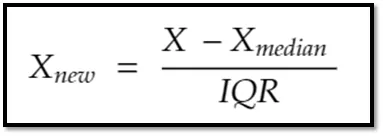

In [ ]:
# Importar la librería Preprocessing de sklearn
from sklearn.preprocessing import RobustScaler

In [ ]:
# Creamos una copia del df original, lo llamamos nueva_df
nueva_df = df.copy()

# Aplicamos el escalamiento robusto a la columna Amount.
# fit_transform ajusta los datos después los transforma, se le pasa la columna Amount convertida a un numpy de dos dimensiones.
# Reshape (-1,1) significa: -1 cualquier cantidad de filas, 1 una columna

nueva_df['Amount'] = RobustScaler().fit_transform(nueva_df['Amount'].to_numpy().reshape(-1,1))

nueva_df['Amount'].hist();

In [ ]:
nueva_df['Amount'].describe()

Se puede observar que el rango de los datos es mucho menor al que teníamos antes.





**Escalamiento de la columna Time**

Para la columna Time se usará el escalamiento de tipo Min-Max


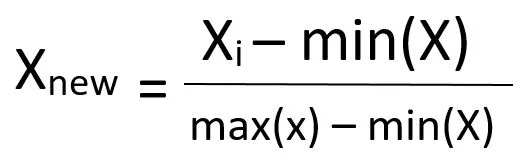

In [ ]:
time_df = nueva_df['Time']
nueva_df['Time'] = (time_df - time_df.min()) / (time_df.max() - time_df.min())
nueva_df

In [ ]:
nueva_df['Time'].hist();

En el caso de la columna Time acotamos el rango a valores entre cero y uno.

### Escogiendo Variables  - Carlos

**Significancia de las variables**

## 2. ¿Por qué el problema amerita ser solucionado por Machine Leaning?

Nuestro problema amerita ser resuelto con una técnica de machine learning debido a que nuestro objetivo es entrenar el algoritmo para reconocer patrones de casos fraudulentos a partir de la información que obtenemos de una transacción. Es decir, queremos identificar anomalías en los datos que podrían indicar un problema en una transacción.  [[1]](https://www.elastic.co/es/what-is/machine-learning#:~:text=La%20detecci%C3%B3n%20de%20anomal%C3%ADas%20es,Conoce%20m%C3%A1s%20sobre%20AIOps.)


En particular, creemos que podemos usar un modelo suvervisado de clasificación y también de regresión, debido a las características de nuestro dataset. La variable objetivo 'Class' funciona como una etiqueta donde el valor 1 indica que una transacción es fraudulenta y un 0 indica que no es fraudulenta.

# Modelo de Clasificación

In [ ]:
# Importando Módulos
from sklearn.model_selection import train_test_split

## División de Datasets
Los datasets se encuentran divididos en entrenamiento y prueba, o entrenamiento, validación y prueba, de manera aleatoria, con proporciones adecuadas.  [[2]](https://builtin.com/data-science/train-test-split)

In [ ]:
# Dividiendo los datos en entrenamiento X, y prueba y.
X = nueva_df.drop('Class', axis=1) # Atributos
y = nueva_df['Class']  # Etiquetas

In [ ]:
# Dividiendo los conjuntos de datos en entrenamiento y prueba
# Test size =  25%
# Train size = 75%
# (semilla) random_state = 50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
# Imprimir las longitudes de los conjuntos de datos para verificar
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))
print(f'Suma de las etiquetas y: {np.sum(y)} \nSuma de los valores de entrenamiento de y: {np.sum(y_train)} \nSuma de los valores de prueba de y: {np.sum(y_test)} ')

In [ ]:
# Distribución del conjunto de datos de entrenamiento y_train
y_muestra_train = pd.DataFrame(y_train)
sns.countplot(y_muestra_train, x ="Class");

Referencia: https://www.youtube.com/watch?v=pohp5AZrp3I&list=PLrR_uxt9l8PvDQan0_QMB5oS3OwWoCiYk

### Seleccionando Muestras  - Diego - Domingo

Necesitamos una submuestra del dataframe que contenga un monto igual de casos fraudulentos como no fraudulentos.

El objetivo es permitir que nuestro modelo de aprendizaje pueda entender mejor los patrones que determinan si una transacción es fraudulenta o no.

Debido al desbalance de los datos originales, no se puede observar las correlaciones verdaderas entre la variable objetivo y las demás características.




Referencias:
- https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [ ]:
#Dado que la mayoría de nuestros datos ya han sido escalados,
#debemos escalar las columnas que quedan por escalar (Cantidad y Tiempo)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler es menos propenso a valores atípicos.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_monto'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_tiempo'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Monto y Tiempo estan escaladas

df.head()

In [ ]:
#Lo que entendí de esta celda es que hace la comparación de resultados de pruebas del dataset original con el dataset escalado
#En realidad veo inecesaria esta prueba por lo que creo que es mejor no hacerla

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [ ]:
#Vamos a mezclar los datos antes de crear las submuestras.
df = df.sample(frac=1)

# Obtenemos 492 fraudes y 492 no fraudes
fraude_df = df.loc[df['Class'] == 1]
no_fraude_df = df.loc[df['Class'] == 0][:492]
#Juntamos los dos dataframes
distribucion_df = pd.concat([fraude_df, no_fraude_df])

# Revolvemos las filas del dataframe
df_ff = distribucion_df.sample(frac=1, random_state=42)

df_ff.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
252836,155991.0,-2.166964,-1.011631,0.986721,1.350219,-0.222675,-0.264904,-0.168004,0.791223,-0.259621,...,0.583943,0.781867,0.294575,-0.047425,-0.024248,-0.387018,0.253877,-0.062767,231.00,0
153823,100223.0,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,2.28,1
98797,66821.0,1.446882,-0.198676,-0.168033,-0.665991,-0.526911,-1.378273,0.060290,-0.483604,-1.342983,...,0.205759,0.587439,-0.180683,0.462679,0.834680,-0.089180,-0.020842,0.004841,15.00,0
163149,115691.0,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,17.06,1
42700,41204.0,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,30.26,1


In [ ]:
df_ff.shape

(984, 31)

Distribución de las clases en el conjunto de datos de la submuestra
0    0.5
1    0.5
Name: Class, dtype: float64


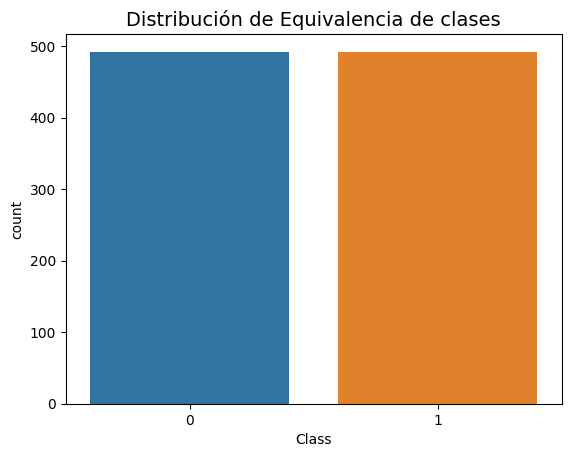

In [ ]:
print('Distribución de las clases en el conjunto de datos de la submuestra')
print(df_ff['Class'].value_counts()/len(df_ff))


sns.countplot(data=df_ff, x='Class')
plt.title('Distribución de Equivalencia de clases', fontsize=14)
plt.show()

In [ ]:
# Para balancear la clase con una distribución igual
# Usaremos una combinación de Oversampling y Undersampling
# Usaremos la librería de SMOTE

from imblearn.over_sampling import SMOTE
over_sample = SMOTE()

x_smote, y_smote = over_sample.fit_resample(X_train, y_train)


In [ ]:
# Distribución del conjunto de datos de entrenamiento y_train
y_muestra_train = pd.DataFrame(y_smote)
sns.countplot(y_muestra_train, x ="Class");

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## Algoritmo de Clasificación

Las métricas presentadas son claras y se interpretan adecuadamente. El algoritmo de clasificación elegido sobrepasa al resto de los algoritmos en eficacia.

In [ ]:
# Lazypredict - Taryn

In [ ]:
# Matriz Consfusion y la ROC - Alexis y Pedro

**Modelo Regresión Logística**  
- Modelo de Aprendizaje Supervisado
- Se usa para predecir la variable categórica dependiente (en este caso es 'Class') usando un conjunto de variables independientes.

In [ ]:
# Regresión Logística

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

model = LogisticRegression()

# Entrenamiento
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7046632124352332


 Referencias:
 - [Regresión Logística](https://aws.amazon.com/es/what-is/logistic-regression/#:~:text=La%20regresi%C3%B3n%20log%C3%ADstica%20es%20una%20t%C3%A9cnica%20importante%20en%20el%20campo,de%20datos%20sin%20intervenci%C3%B3n%20humana.)

__Árbol de Decisión__  Taryn
- Modelo de Aprendizaje Supervisado.
- Se puede usar para problemas de clasificación y regresión.
- Es un clasificador de tres estructuras, donde los nodos interiores representan las características del dataset, y las ramas representan las reglas de decisión donde cada hoja representa un outcome.


In [ ]:
# Árbol de Decisión

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=42)

# Entrenamiento
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

In [ ]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#Revisamos el dataset
df = pd.read_csv('/content/creditcard.csv')
df

In [ ]:
#Definir variables
X = df.drop('Class', axis=1)
y = df.Class

In [ ]:
#Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Modelo de arbol de desición
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol

DecisionTreeClassifier(random_state=42)

In [ ]:
#Entrenamiento
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Predicciones
predicciones = modelo_arbol.predict(X_test)
predicciones

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
#Precision del modelo
precision = np.mean(predicciones == y_test)
print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}')

Precisión del modelo en el conjunto de prueba: 1.00


In [ ]:
# Reporte de Clasificación
print(classification_report(y_test, predicciones))

# F1 Score
print("F1 Score:", f1_score(y_test, predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.7428571428571428


In [ ]:
#Validacion cruzada
scores = cross_val_score(modelo_arbol, X, y, cv=5)
print(f'Precisión de validación cruzada: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

Precisión de validación cruzada: 0.80 (+/- 0.79)


__Random Forest__


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

model = RandomForestClassifier()

# Entrenamiento
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Reporte de Clasificación
print(classification_report(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.8636363636363635


## Validación por K-Fold o LOOCV

Las pruebas de validación cruzada se aplican adecuadamente en conjunto con los algoritmos, de tal manera que no hay datos favoritos o fácilmente clasificables en el dataset de pruebas


### Validación Cruzada K-Fold Taryn



* La validación cruzada (K-fold) es una técnica para evaluar el rendimiento de un modelo de forma robusta.   
* Divide los datos en conjuntos de entrenamiento y prueba múltiples veces.   
* Permite una evaluación más precisa de cómo el modelo generaliza a datos no vistos.   
* Ayuda a evitar el sobreajuste (overfitting) y proporciona una medida más fiable del rendimiento del modelo.
[[Sesion 2]](https://github.com/alemora24/C1-Machine-Learning-MASIVO/blob/main/Sesion-02/Ejemplo02.ipynb
)


In [ ]:
# Importando bibliotecas
import numpy as np
from sklearn.model_selection import KFold

In [ ]:
# Definir el número de pliegues para la validación cruzada
num_pliegues = 5

In [ ]:
# Crear un objeto KFold para dividir los datos en pliegues
kf = KFold(n_splits=num_pliegues, shuffle=True, random_state=42)

### Métricas de Desempeño

**Confusion Matrix**  
* Una matriz de confusión nos ayuda a describir el desempeño de un modelo de clasificación sobre un conjunto de datos de prueba para los cuales se conocen los valores verdaderos.   
* Muestra cuántos casos se clasificaron correctamente (verdaderos positivos y verdaderos negativos) y ls que se clasificaron incorrectamente (falsos positivos y falsos negativos).   
* Nos ayuda a evaluar la precisión y el rendimiento del modelo.
 [[Ref]](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a%20performance%20evaluation%20tool%20in%20machine,false%20positives%2C%20and%20false%20negatives.)

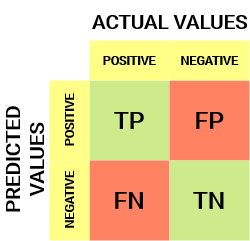

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

**Reportes de Clasificación**



El reporte de clasificación consiste en presentar métricas que evalúen el desempeño del modelo. Dichas métricas pueden ser:
- Precisión
- Sensibilidad
- Especificidad
- F1-Score
- AUC - ROC
- Error Cudrático Medio (MSE)
- Coeficiente de Determinación (R^2)

**Precisión :**  
Mide la proporción de predicciones correctas sobre el total de predicciones.  
Fórmula: Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)


__Sensibilidad:__  




__F1-Score:__  


__AUC-ROC__



# Referencias

Referencias:

- https://www.elastic.co/es/what-is/machine-learning

- https://www.geeksforgeeks.org/getting-started-machine-learning/?ref=lbp

- https://www.youtube.com/watch?v=M_Cu7r9gik4&list=TLPQMDExMjIwMjMvG_hqJzTdLg&index=2

- https://www.youtube.com/watch?v=NCgjcHLFNDg&t=540s

- https://www.youtube.com/watch?v=sq5BYW4COwA

- https://www.youtube.com/watch?v=v14ydtOuOr4

Guión

-